# Create a design of experiments with discrete and continuous variables

In this example we present how to create a design of experiments when one (or several) of the marginals are discrete.

In [1]:
from __future__ import print_function
import openturns as ot

To create the first marginal of the distribution, we select a univariate discrete distribution. Some of them, like the `Bernoulli` or `Geometric` distributions, are implemented in the library as classes. In this example however, we pick the `UserDefined` distribution that assigns equal weights to the values -2, -1, 1 and 2.

In [2]:
sample = ot.Sample([[-2.], [-1.], [1.], [2.]])
sample

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=4 dimension=1 data=[[-2],[-1],[1],[2]]

In [3]:
X0 = ot.UserDefined(sample)

For the second marginal, we pick a Gaussian distribution.

In [4]:
X1 = ot.Normal()

Create the multivariate distribution from its marginals and an independent copula.

In [5]:
distribution = ot.ComposedDistribution([X0,X1])

Create the design.

In [6]:
size = 100
experiment = ot.MonteCarloExperiment(distribution, size)
sample = experiment.generate()

Plot the design.

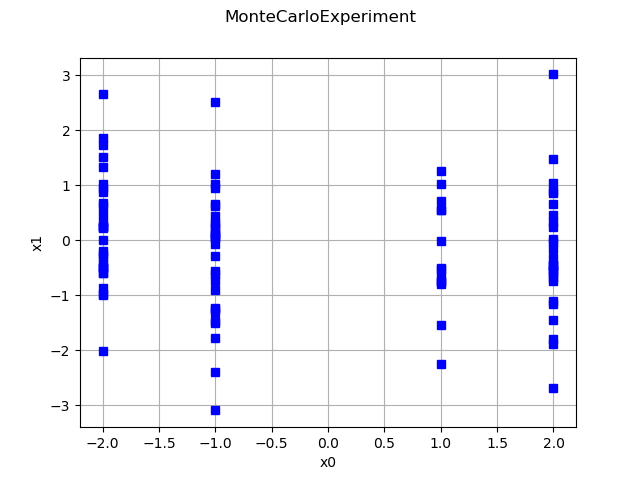

In [7]:
graph = ot.Graph("MonteCarloExperiment", "x0", "x1", True, "")
cloud = ot.Cloud(sample, "blue", "fsquare", "")
graph.add(cloud)
graph

Any other type of design of experiments can be generated based on this distribution. The following example shows a LHS experiment.

In [8]:
size = 100
alwaysShuffle = True
randomShift = True
experiment = ot.LHSExperiment(distribution, size, alwaysShuffle, randomShift)
sample = experiment.generate()

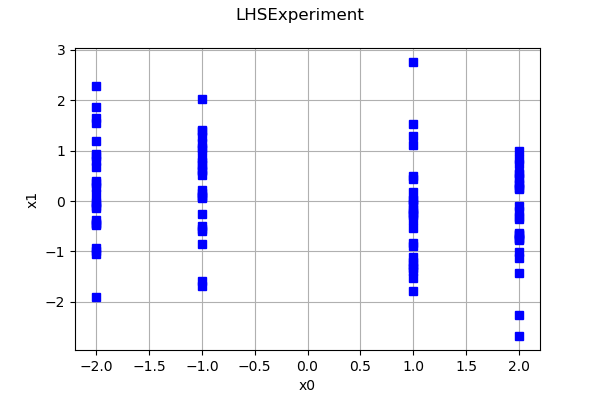

In [9]:
graph = ot.Graph("LHSExperiment", "x0", "x1", True, "")
cloud = ot.Cloud(sample, "blue", "fsquare", "")
graph.add(cloud)
graph